# Testing if a Distribution is Normal

## Imports

In [ ]:
#import sys
#!{sys.executable} -m pip install -r requirements.txt

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set plotting options
%matplotlib inline
plt.rc('figure', figsize=(16, 9))

## Testing if a Distribution is Normal

### Create normal and non-normal distributions

In [3]:
# Sample A: Normal distribution
sample_a = stats.norm.rvs(loc=0.0, scale=1.0, size=(1000,))

# Sample B: Non-normal distribution
sample_b = stats.lognorm.rvs(s=0.5, loc=0.0, scale=1.0, size=(1000,))

### Boxplot-Whisker Plot and Histogram

We can visually check if a distribution looks normally distributed.  Recall that a box whisker plot lets us check for symmetry around the mean.  A histogram lets us see the overall shape.  A QQ-plot lets us compare our data distribution with a normal distribution (or any other theoretical "ideal" distribution).

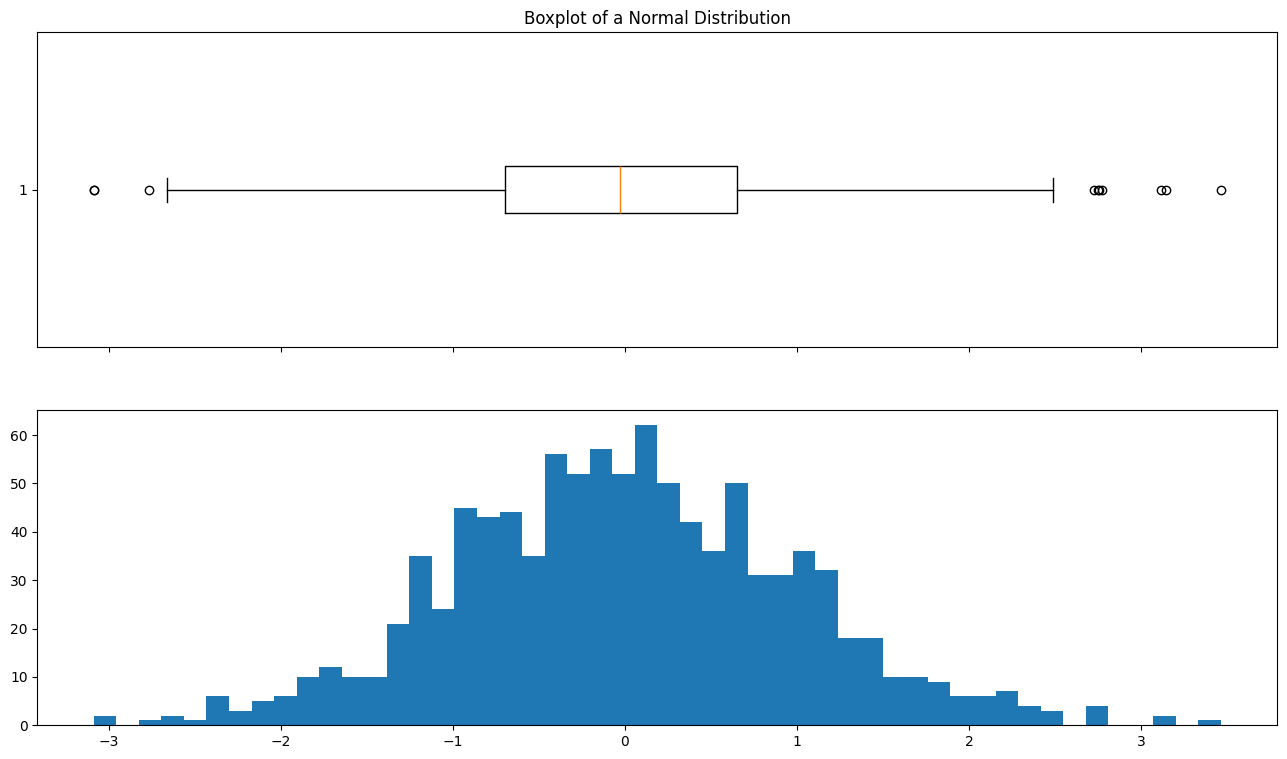

In [4]:
# Sample A: Normal distribution
sample_a = stats.norm.rvs(loc=0.0, scale=1.0, size=(1000,))
fig, axes = plt.subplots(2, 1, figsize=(16, 9), sharex=True)
axes[0].boxplot(sample_a, vert=False)
axes[1].hist(sample_a, bins=50)
axes[0].set_title("Boxplot of a Normal Distribution");

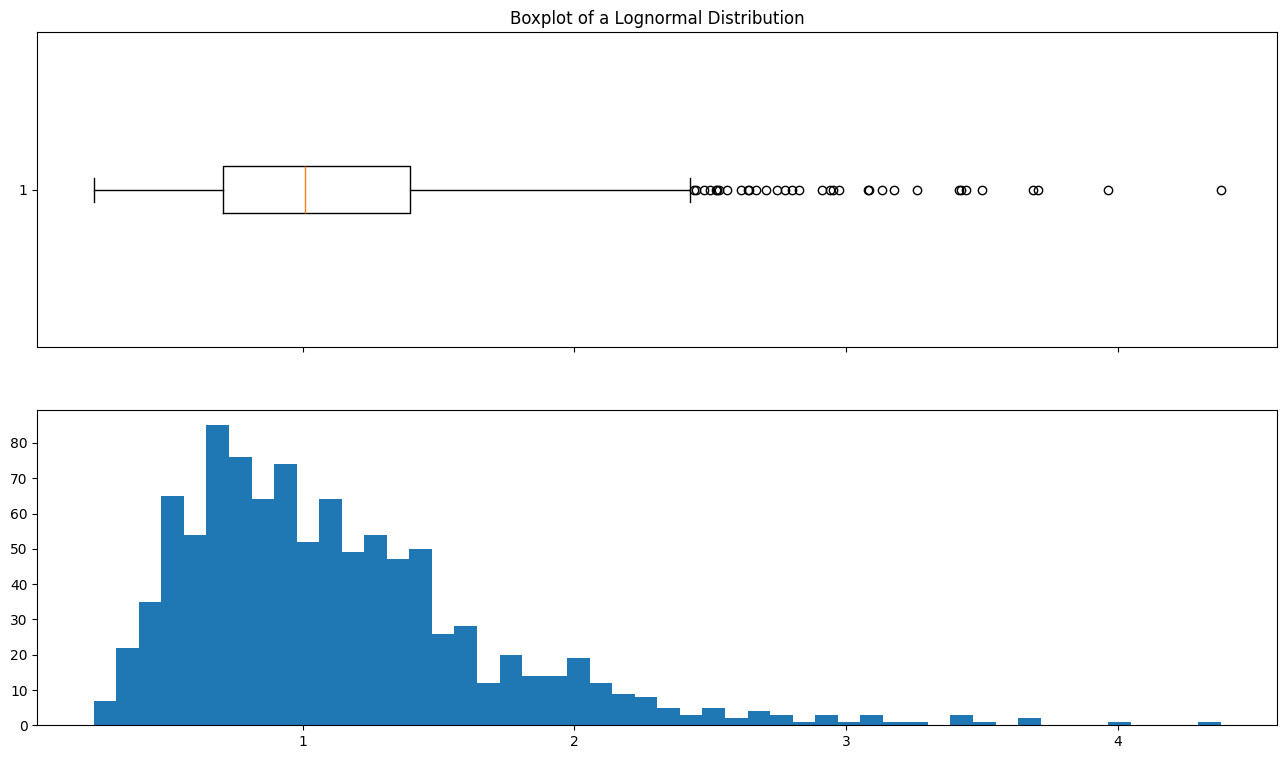

In [5]:
# Sample B: Non-normal distribution
sample_b = stats.lognorm.rvs(s=0.5, loc=0.0, scale=1.0, size=(1000,))
fig, axes = plt.subplots(2, 1, figsize=(16, 9), sharex=True)
axes[0].boxplot(sample_b, vert=False)
axes[1].hist(sample_b, bins=50)
axes[0].set_title("Boxplot of a Lognormal Distribution");

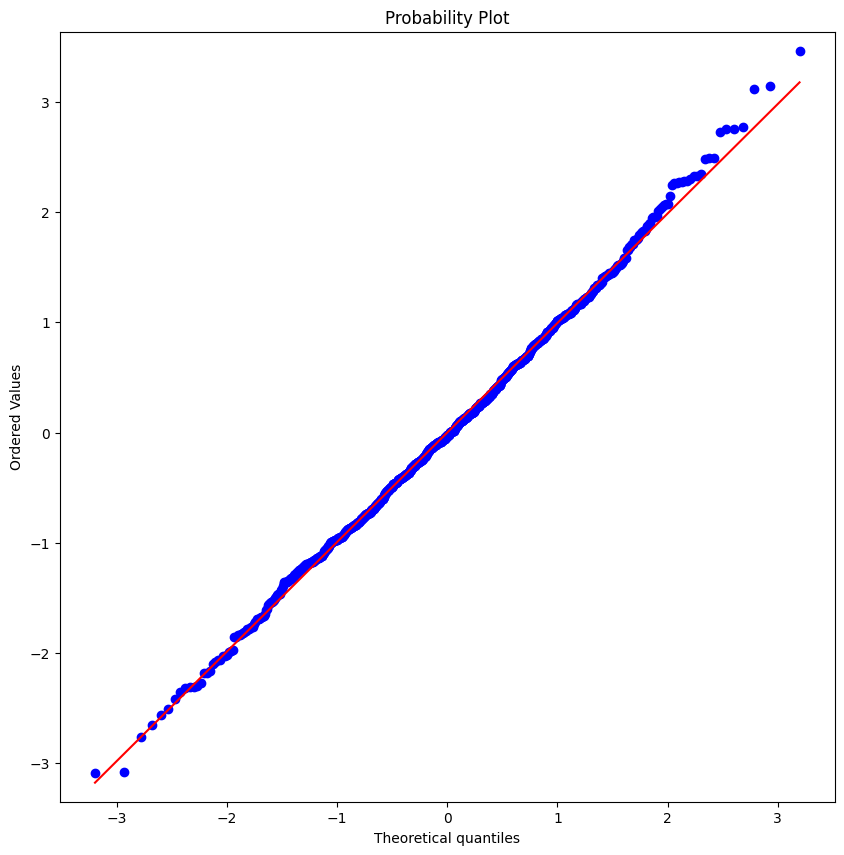

In [6]:
# Q-Q plot of normally-distributed sample
plt.figure(figsize=(10, 10)); plt.axis('equal')
stats.probplot(sample_a, dist='norm', plot=plt);

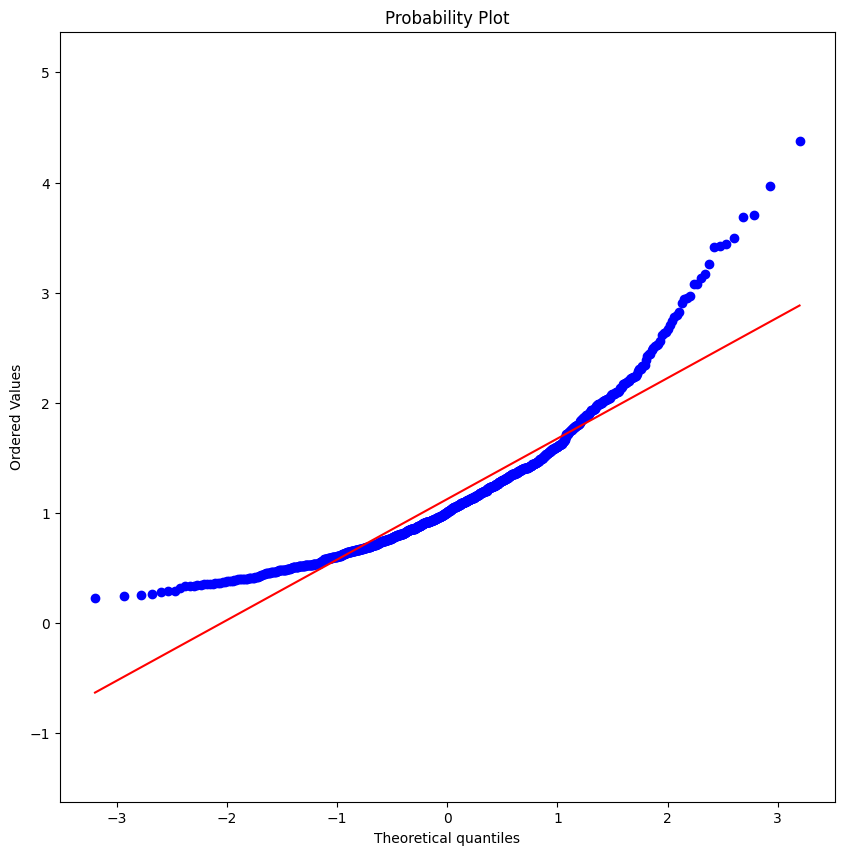

In [7]:
# Q-Q plot of non-normally-distributed sample
plt.figure(figsize=(10, 10)); plt.axis('equal')
stats.probplot(sample_b, dist='norm', plot=plt);

### Testing for Normality
#### Shapiro-Wilk

The Shapiro-Wilk test is available in the scipy library.  The null hypothesis assumes that the data distribution is normal.  If the p-value is greater than the chosen p-value, we'll assume that it's normal. Otherwise we assume that it's not normal.
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.shapiro.html

In [8]:

def is_normal(sample, test=stats.shapiro, p_level=0.05, **kwargs):
    """Apply a normality test to check if sample is normally distributed."""
    t_stat, p_value = test(sample, **kwargs)
    print("Test statistic: {}, p-value: {}".format(t_stat, p_value))
    print("Is the distribution Likely Normal? {}".format(p_value > p_level))
    return p_value > p_level

# Using Shapiro-Wilk test (default)
print("Sample A:-"); is_normal(sample_a);
print("Sample B:-"); is_normal(sample_b);

Sample A:-
Test statistic: 0.9981990422814838, p-value: 0.3762142429205551
Is the distribution Likely Normal? True
Sample B:-
Test statistic: 0.8973001578090423, p-value: 2.610038428090978e-25
Is the distribution Likely Normal? False


### Kolmogorov-Smirnov

The Kolmogorov-Smirnov is available in the scipy.stats library.  The K-S test compares the data distribution with a theoretical distribution.  We'll choose the 'norm' (normal) distribution as the theoretical distribution, and we also need to specify the mean and standard deviation of this theoretical distribution.  We'll set the mean and stanadard deviation of the theoretical norm with the mean and standard deviation of the data distribution.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html

In [9]:
def is_normal_ks(sample, test=stats.kstest, p_level=0.05, **kwargs):
    """
    sample: a sample distribution
    test: a function that tests for normality
    p_level: if the test returns a p-value > than p_level, assume normality
    
    return: True if distribution is normal, False otherwise
    """
    normal_args = (np.mean(sample), np.std(sample))
    
    t_stat, p_value = test(sample, 'norm', normal_args, **kwargs)
    print("Test statistic: {}, p-value: {}".format(t_stat, p_value))
    print("Is the distribution Likely Normal? {}".format(p_value > p_level))
    return p_value > p_level

In [10]:
# Using Kolmogorov-Smirnov test
print("Sample A:-"); is_normal_ks(sample_a);
print("Sample B:-"); is_normal_ks(sample_b);

Sample A:-
Test statistic: 0.020566776789690988, p-value: 0.7833564456791765
Is the distribution Likely Normal? True
Sample B:-
Test statistic: 0.08750221138183345, p-value: 4.1237144784858046e-07
Is the distribution Likely Normal? False


## Regression with two financial assets

In [11]:
import yfinance as yf

/Users/mescobars/dev/projects/GitHub/regressions-recap/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [14]:
def fetch_yf(tickers, start_date, end_date):
    df = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)['Close']
    df.reset_index(inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    
    return df

In [35]:
# fetching parameters
start_date = '2014-12-31'
end_date = '2024-12-31'

# yf tickers
tickers = ['GBPUSD=X', 'EURUSD=X']

df = fetch_yf(tickers, start_date, end_date)

df.fillna(method='ffill', inplace=True)

print(df.head(5))
print(df.tail(5))


[*********************100%***********************]  2 of 2 completed

Ticker       Date  EURUSD=X  GBPUSD=X
0      2014-12-31  1.216205  1.556905
1      2015-01-01  1.209863  1.558094
2      2015-01-02  1.208941  1.557972
3      2015-01-05  1.194643  1.528491
4      2015-01-06  1.193902  1.525832
Ticker       Date  EURUSD=X  GBPUSD=X
2601   2024-12-24  1.040583  1.253447
2602   2024-12-25  1.040258  1.253604
2603   2024-12-26  1.039955  1.254375
2604   2024-12-27  1.042318  1.252976
2605   2024-12-30  1.042938  1.257881



/var/folders/18/blnm1nm50696kqjfj926l25r0000gn/T/ipykernel_8991/1976912702.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


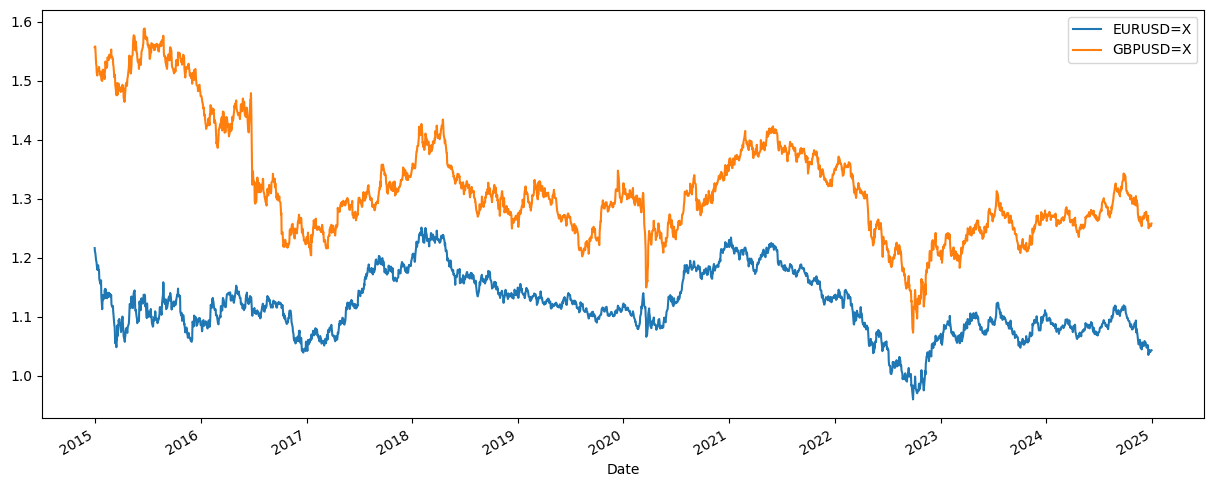

In [36]:
data = df.copy()
data.set_index('Date', inplace=True)

# First column
s1 = pd.Series(data.iloc[:, 0])
# Second column
s2 = pd.Series(data.iloc[:, 1])

# plot the two series
pd.concat([s1, s2], axis=1).plot(figsize=(15,6))
plt.show()

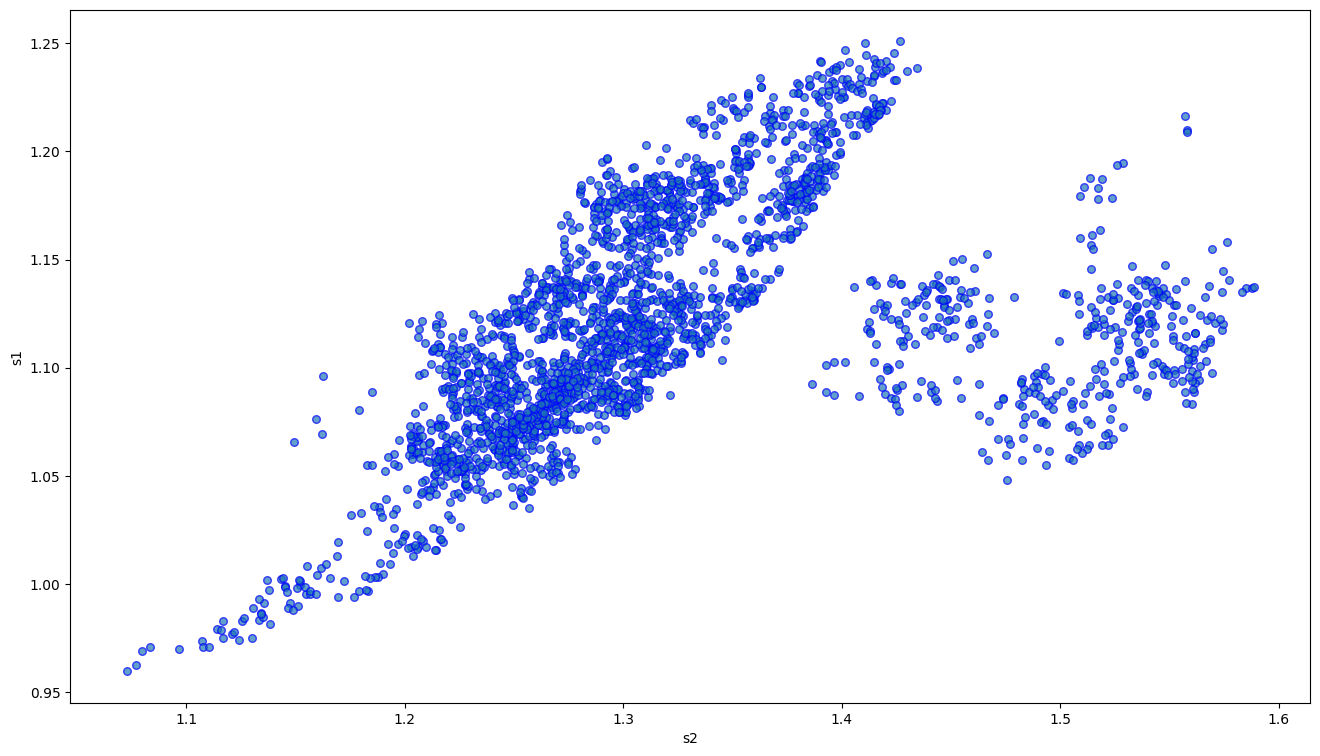

In [37]:
## Plot data with scatterplot
sc = plt.scatter(s2, s1, s=30, edgecolor='b', alpha=0.7)
plt.xlabel('s2')
plt.ylabel('s1');

### Linear Regression
Note that the LinearRegression().fit() expects 2D numpy arrays.  Since s1 and s2 are pandas series, we can use Series.values to get the values as a numpy array. Since these are 1D arrays, we can use numpy.reshape(-1,1) to make these 1000 row by 1 column 2 dimensional arrays.  

The coefficients of the linear regression, $\beta$ and $intercept$ for the regression line:  
$y = \beta \times x + intercept$  
Can be obtained after fitting to the data.  Use `LinearRegression.coef_` for the slope (beta coefficients) and `LinearRegression.intercept_` for the intercept.  You may want to practice accessing these outside of the function definition, to see if you'll need additional brackets `[]` to access the values.

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
def regression_slope_and_intercept(xSeries, ySeries):
    """
    xSeries: pandas series, x variable
    ySeries: pandas series, y variable
    """
    lr = LinearRegression()
    #TODO: get the values from each series, reshape to be 2 dimensional
    #set s1 to the x variable, s2 to the y variable
    xVar = s1.values.reshape(-1, 1)
    yVar = s2.values.reshape(-1, 1)
    
    #TODO: call LinearRegression.fit().  Pass in the x variable then y variable
    lr.fit(xVar, yVar)
    
    #TODO: obtain the slope and intercept
    slope = lr.coef_[0][0]
    intercept = lr.intercept_[0]
    
    return (slope, intercept)

In [38]:
slope, intercept = regression_slope_and_intercept(s1,s2);
print(f"slope {slope:.2f} and intercept {intercept:.2f}")

slope 0.81 and intercept 0.41


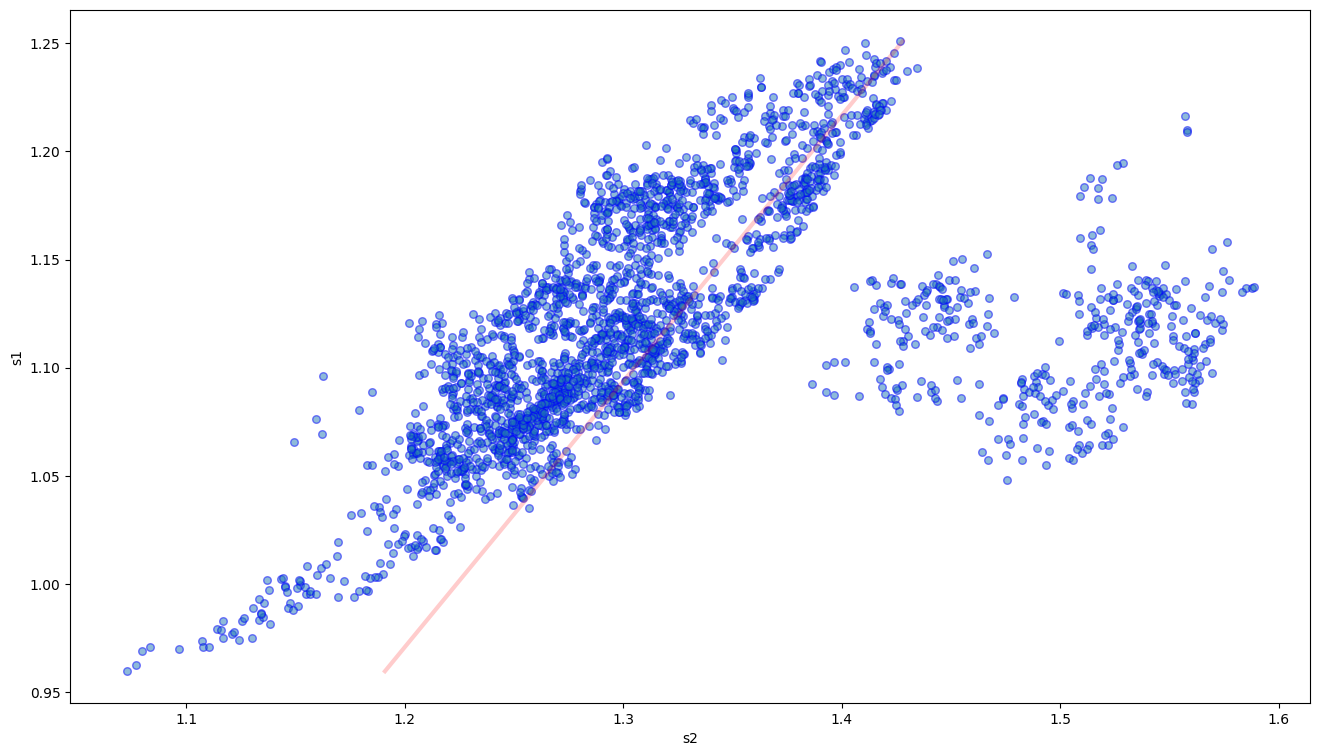

In [39]:
plt.scatter(s2, s1, s=30, edgecolor='b', alpha=0.5);
x = np.linspace(s1.min()-0, s1.max()+0, 2)
yPred = slope * x + intercept
plt.plot(yPred,x, alpha=0.2, lw=3, color='r')
plt.xlabel('s2')
plt.ylabel('s1');